In [1]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart_disease.xlsx to heart_disease (4).xlsx


In [3]:
data_desc=pd.read_excel('heart_disease.xlsx',sheet_name='Description')

In [4]:

data_desc

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [5]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [8]:
df.size

11804

In [9]:
df.shape

(908, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [12]:
features=df.drop('num',axis=1)
target=df['num']

In [13]:
num_cols=features.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [14]:
cat_cols=features.select_dtypes(exclude=np.number).columns
cat_cols

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [15]:
cat_cols=cat_cols.drop('fbs')
cat_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

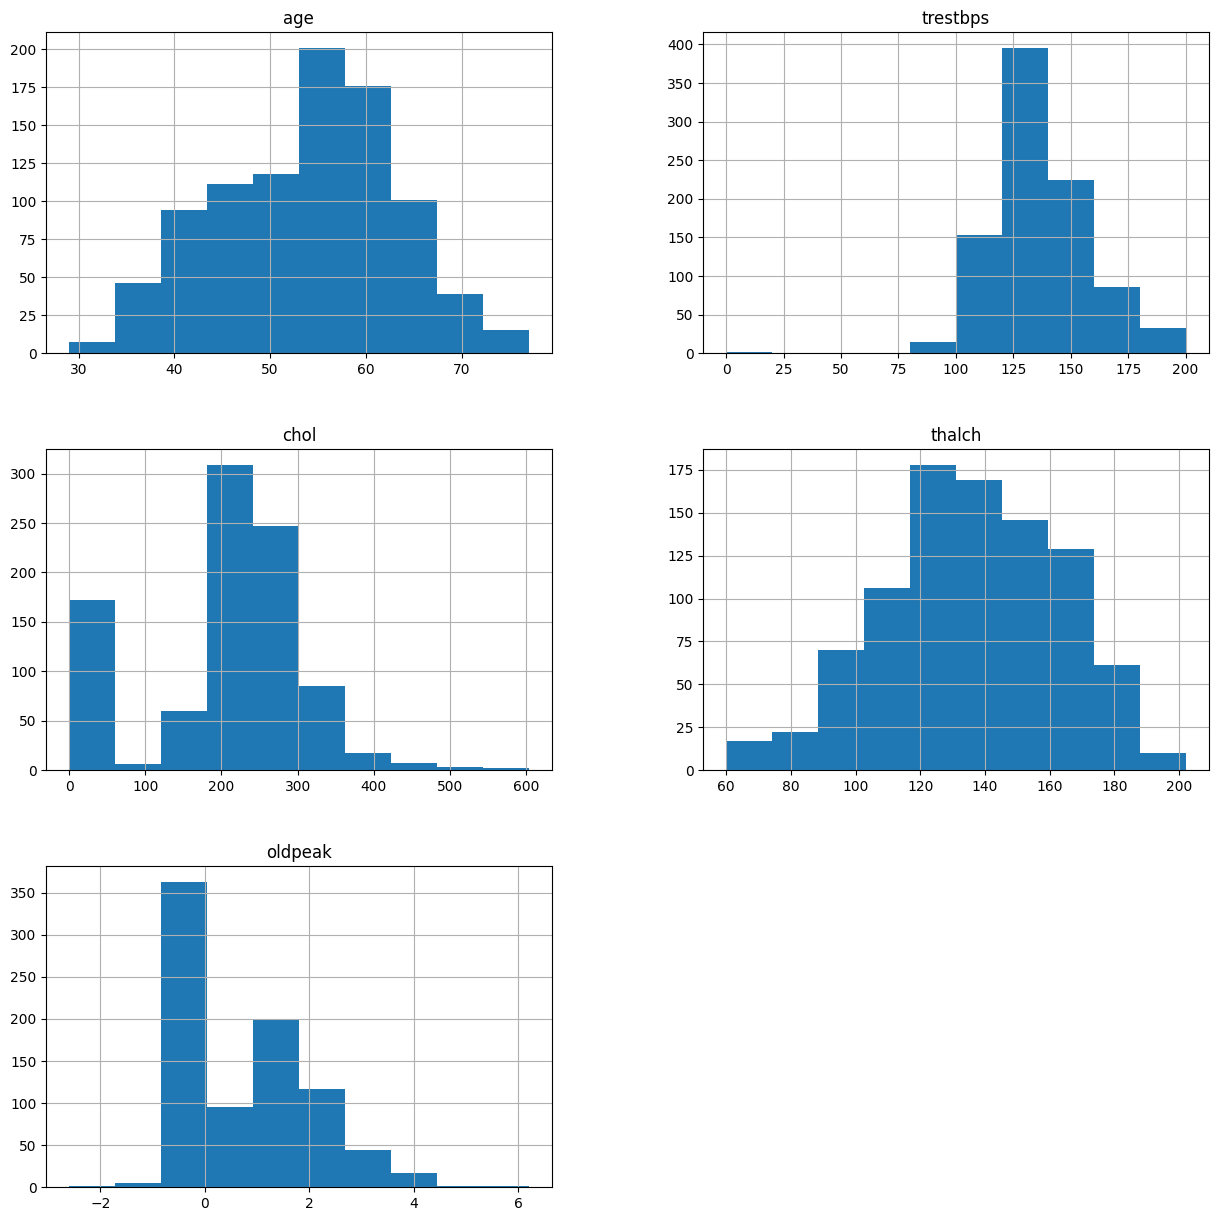

In [16]:
features.hist(figsize=(15,15))
plt.show()

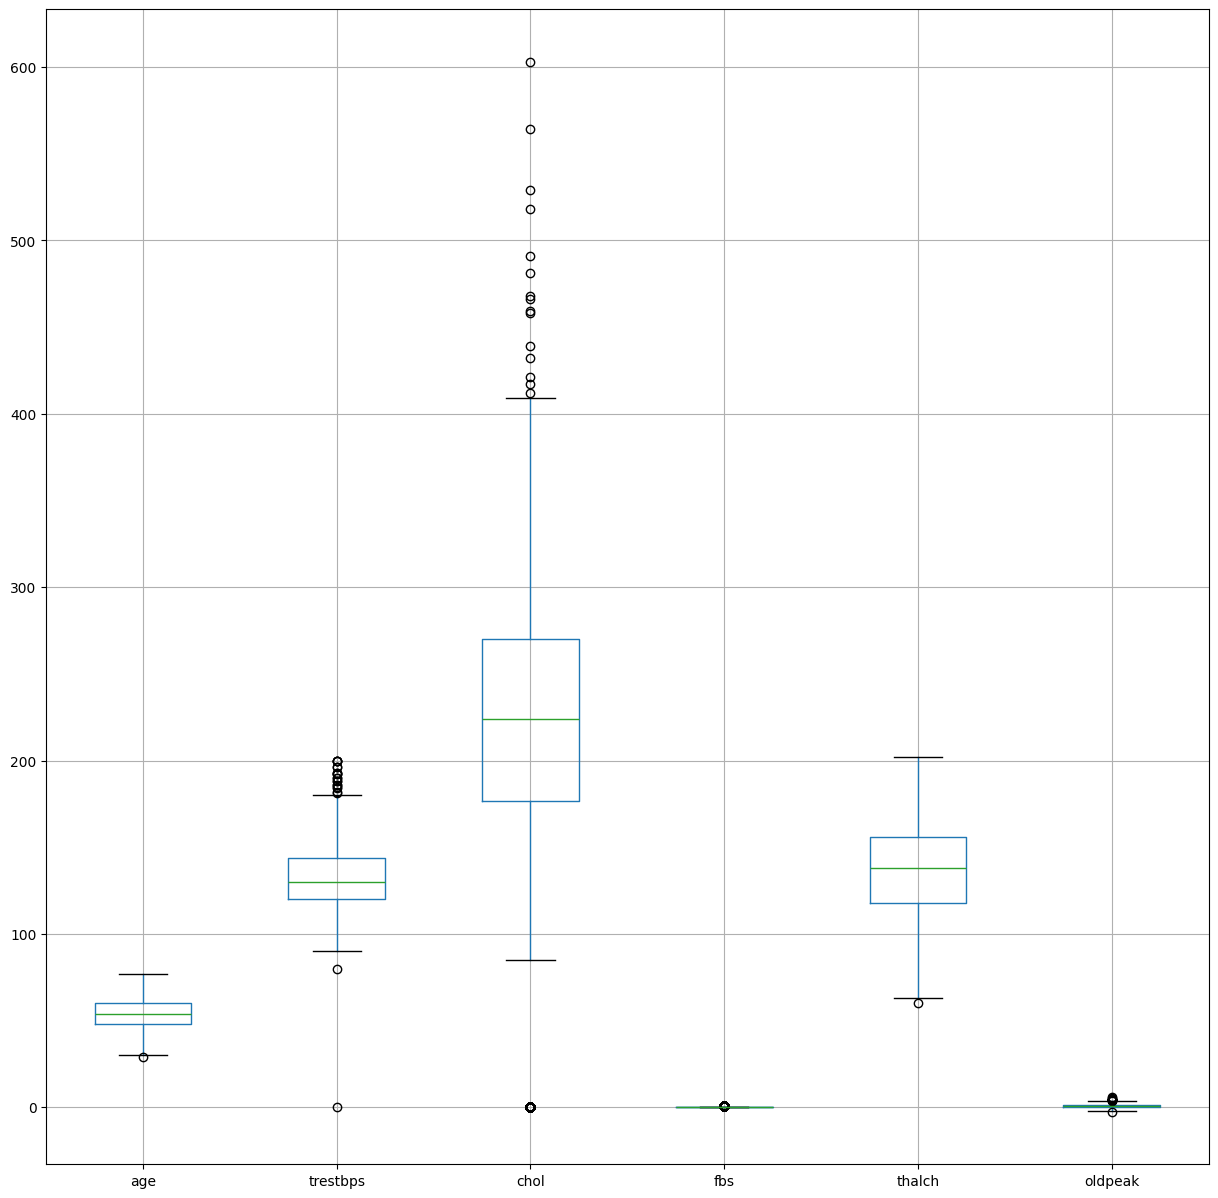

In [17]:
features.boxplot(figsize=(15,15))
plt.show()

In [18]:
features.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [19]:
features['oldpeak']=features['oldpeak'].fillna(features['oldpeak'].mean())

In [20]:
features.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [21]:
binary_encoding_cols = ['sex', 'fbs', 'exang']
for col in binary_encoding_cols:
    features[col] = features[col].map({'Male': 1, 'Female': 0, True: 1, False: 0, 'TURE': 1, 'FALSE' : 0})

In [22]:
# One-hot encoding for multi-category columns
multi_category_cols = ['cp', 'restecg', 'slope', 'thal']
features = pd.get_dummies(features, columns=multi_category_cols, drop_first=True, dtype=int)

In [23]:
std_scaler=StandardScaler()

In [24]:
features[num_cols]=std_scaler.fit_transform(features[num_cols])

In [25]:
features.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,1,0.567394,0.281297,1,0.524183,0,1.334996,0,0,1,0,0,0,0,0,0
1,-1.397560,1,0.076967,0.013526,0,-0.147705,0,-0.844594,1,0,0,1,0,1,0,0,0
2,0.350503,1,0.322181,-0.084656,0,0.449529,0,-0.465535,0,0,0,1,0,1,0,0,0
3,-0.195767,1,-0.756760,-0.138211,0,2.017268,0,-0.844594,0,0,1,0,0,1,0,0,0
4,0.350503,1,-1.149102,-0.004325,0,-0.371668,1,0.576878,0,0,0,1,0,1,0,0,0


In [26]:
# Apply log transform to 'chol' and 'trestbps'
for col in ['chol', 'trestbps']:
  features[col] = np.log(features[col] + 1)  # Adding 1 to avoid log(0) errors

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
features['age_chol_ratio'] =features['age'] / features['chol']
features['trestbps_thalch_product'] = features['trestbps'] * features['thalch']

In [28]:
features.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect',
       'age_chol_ratio', 'trestbps_thalch_product'],
      dtype='object')

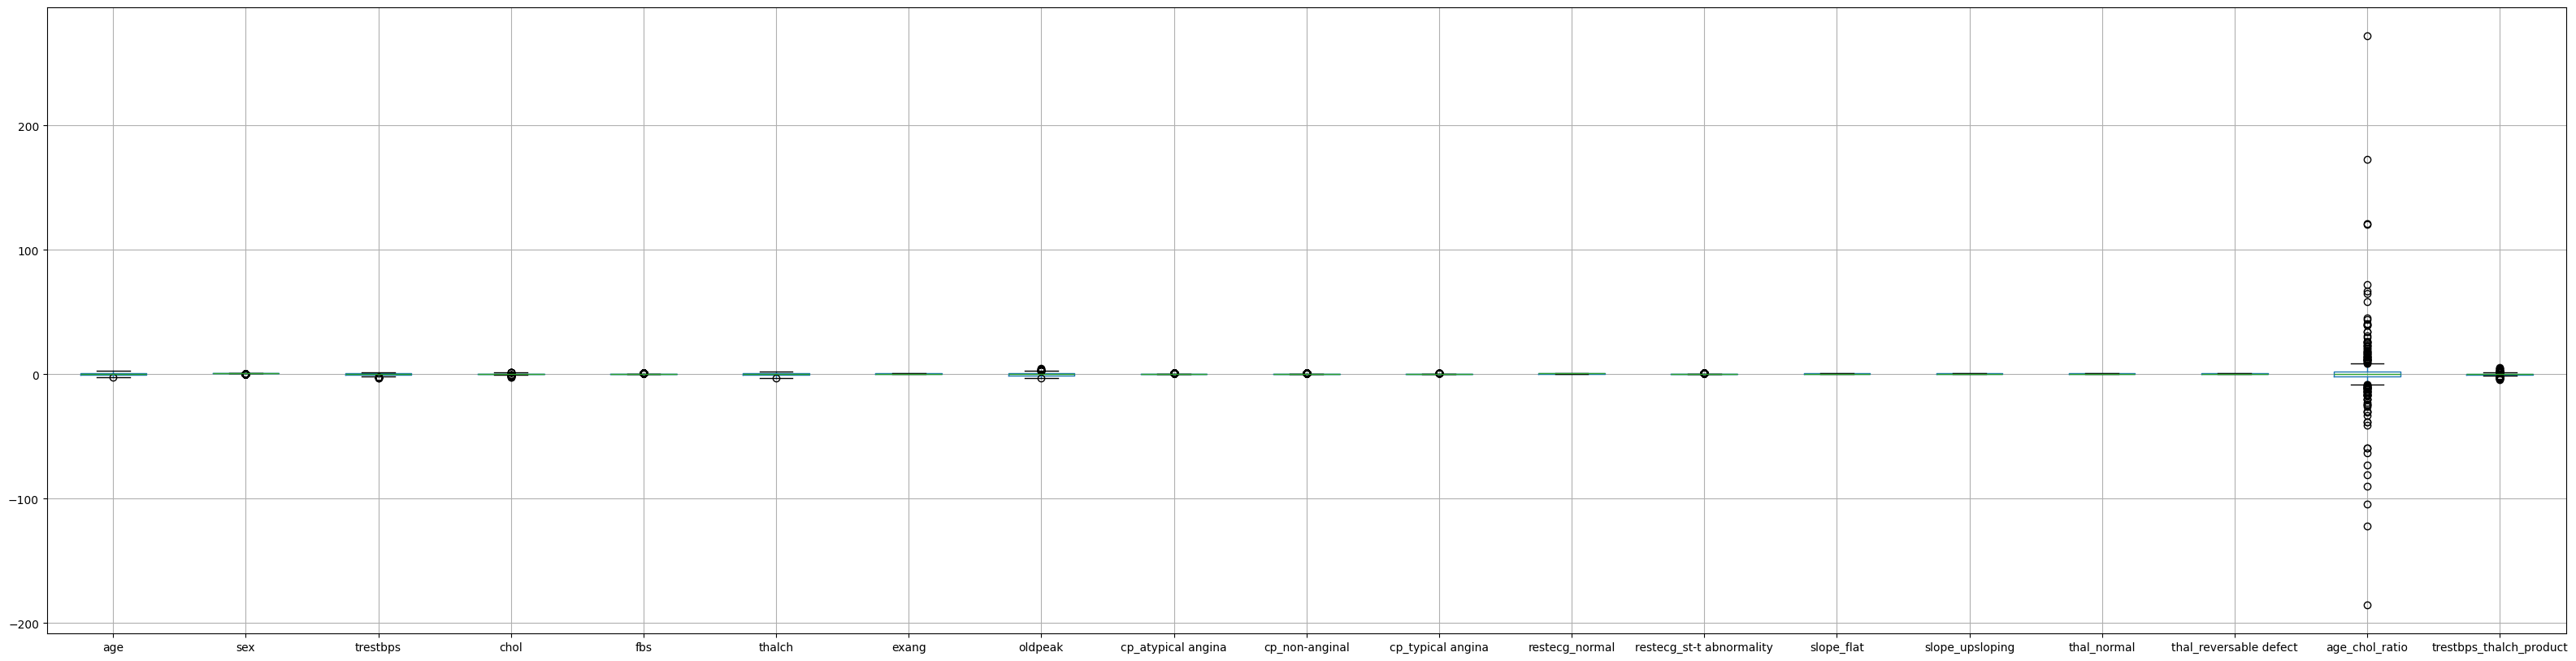

In [29]:
features.boxplot(figsize=(40,10))
plt.show()

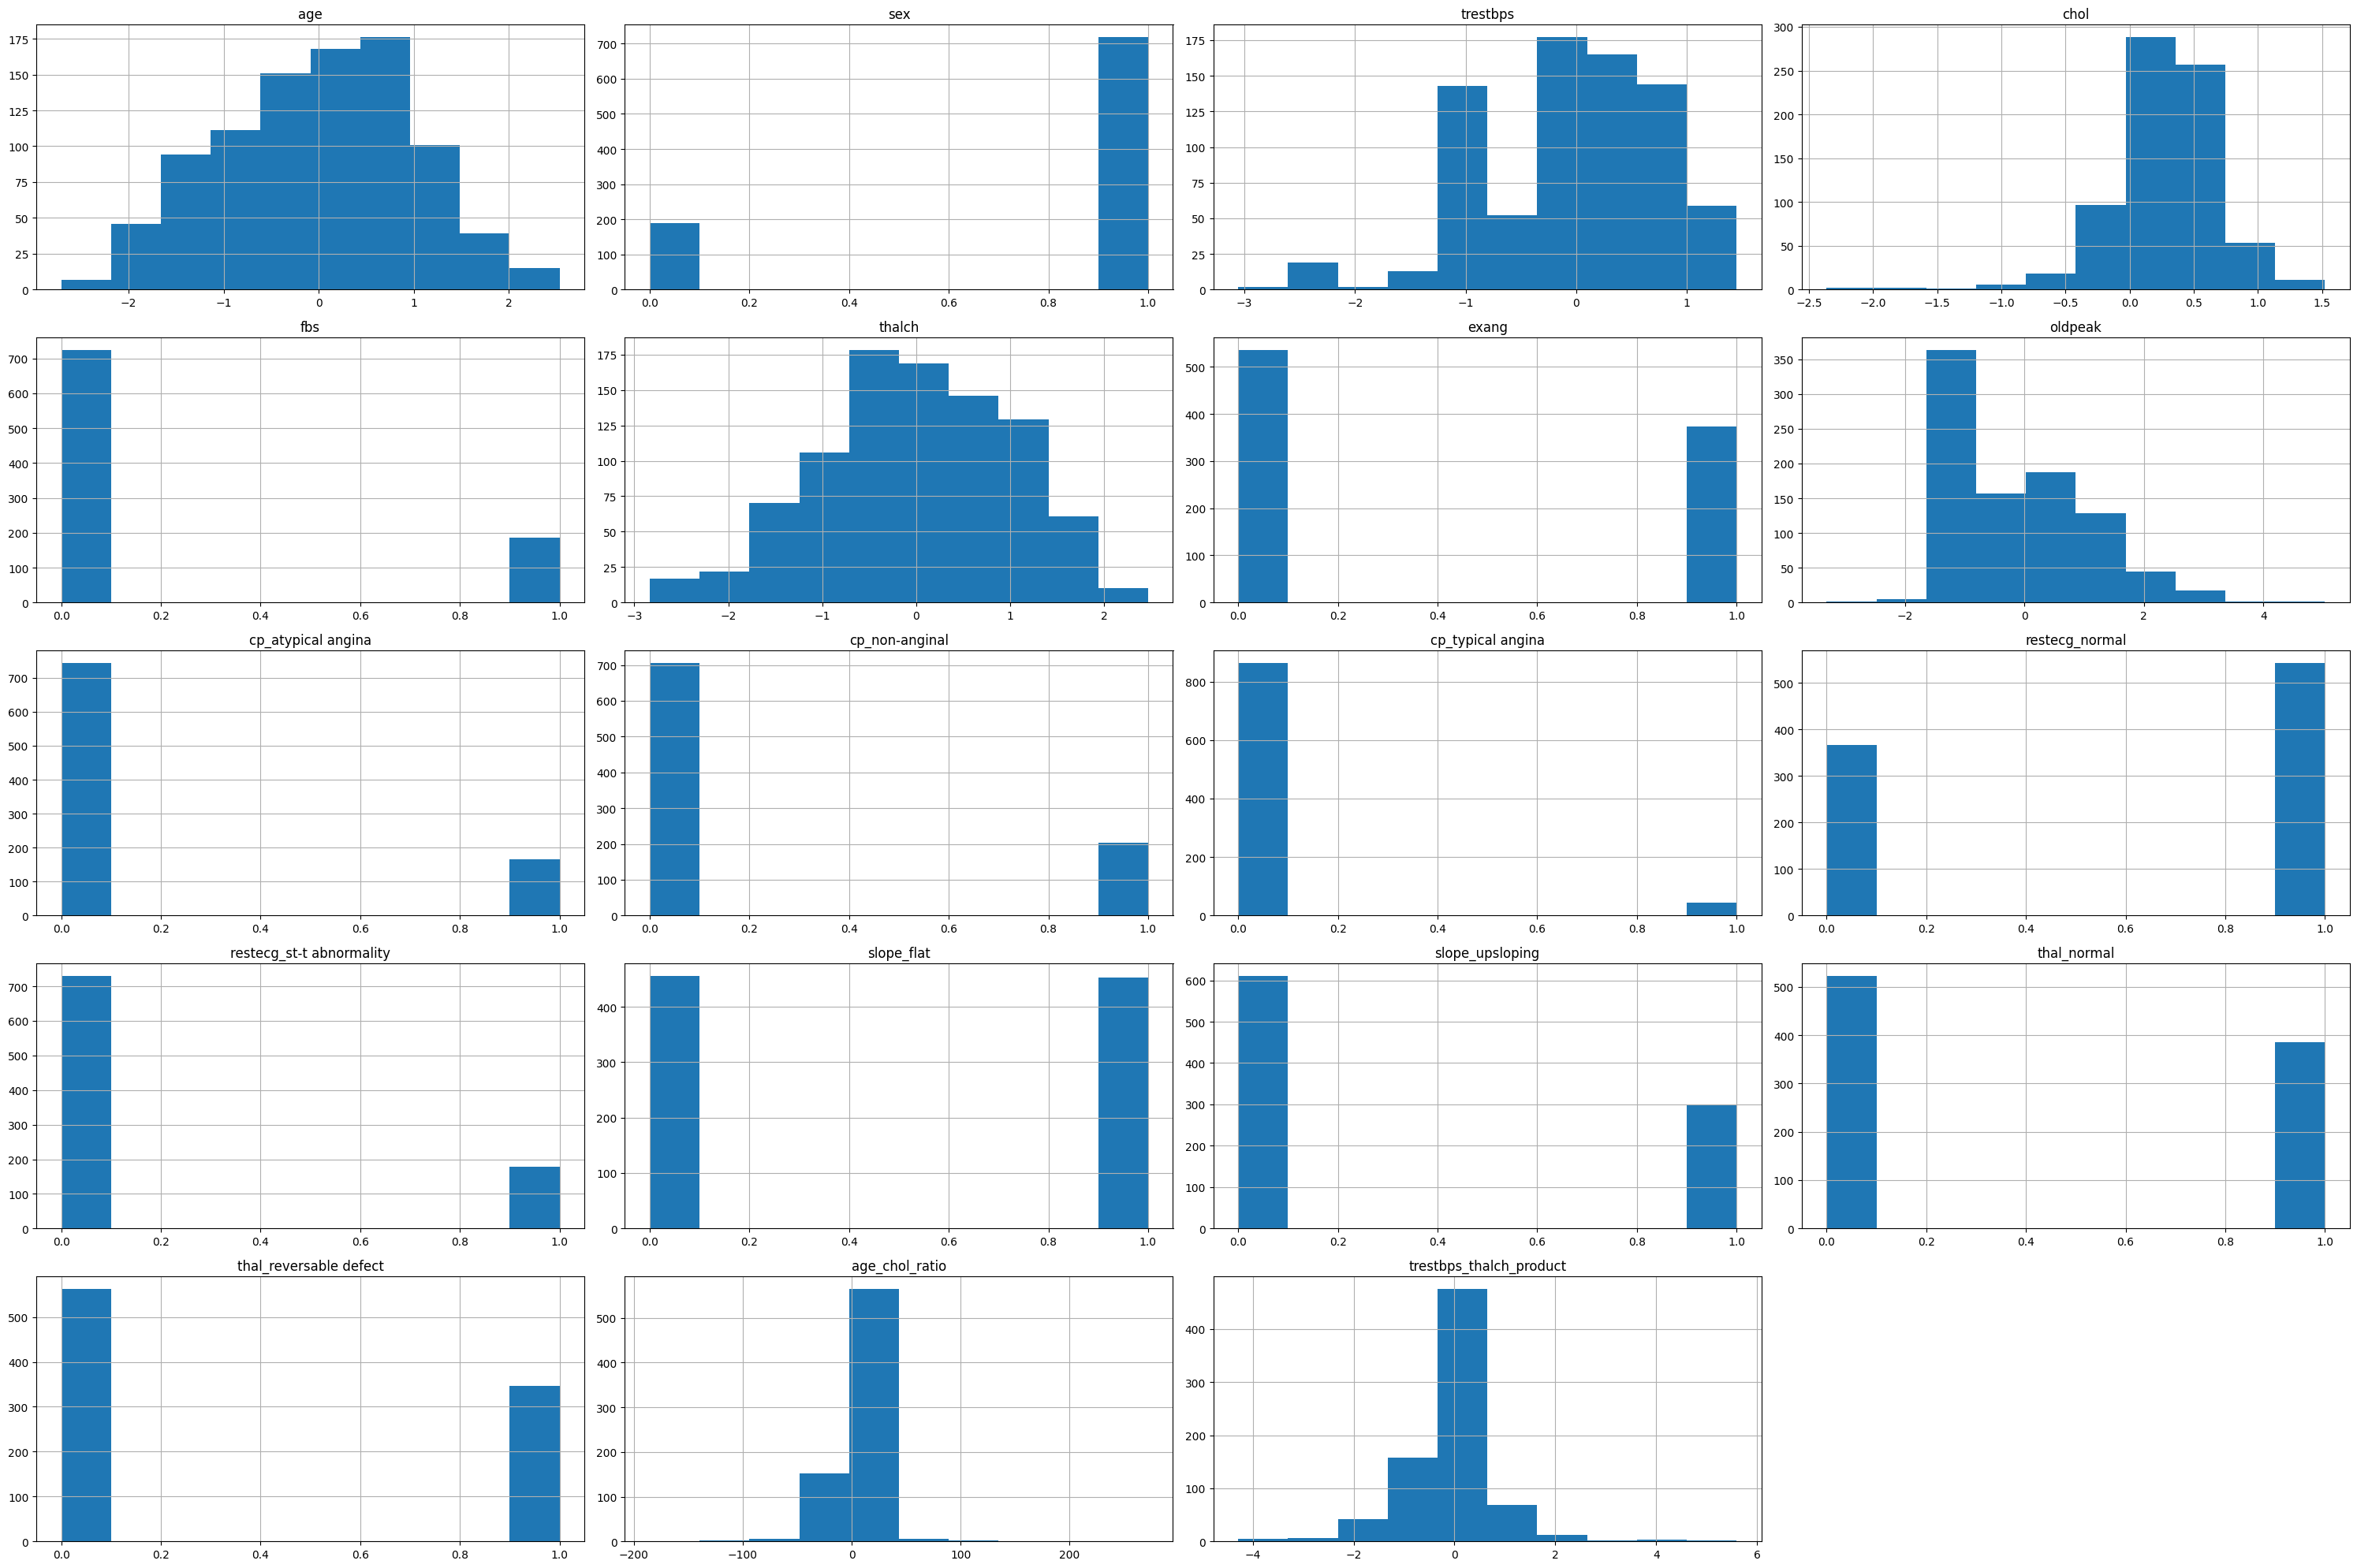

In [30]:
features.hist(figsize=(30,20))
plt.tight_layout()
plt.show()

In [31]:
features.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect',
       'age_chol_ratio', 'trestbps_thalch_product'],
      dtype='object')

In [32]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


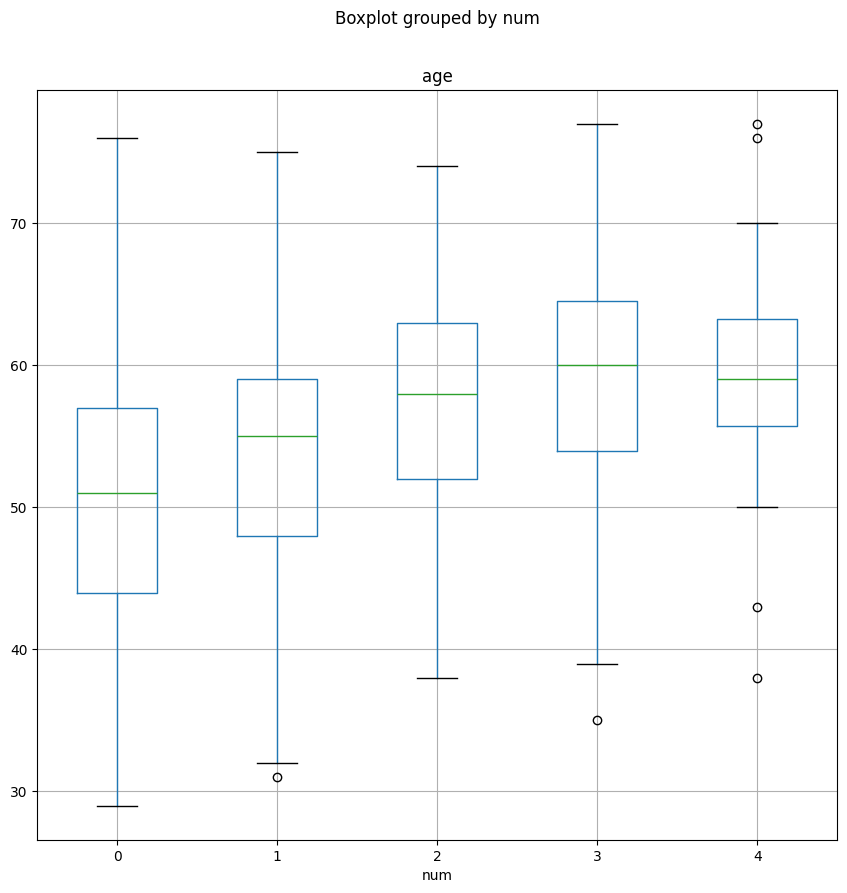

In [33]:
df.boxplot(column='age',by='num',figsize=(10,10))
plt.show()

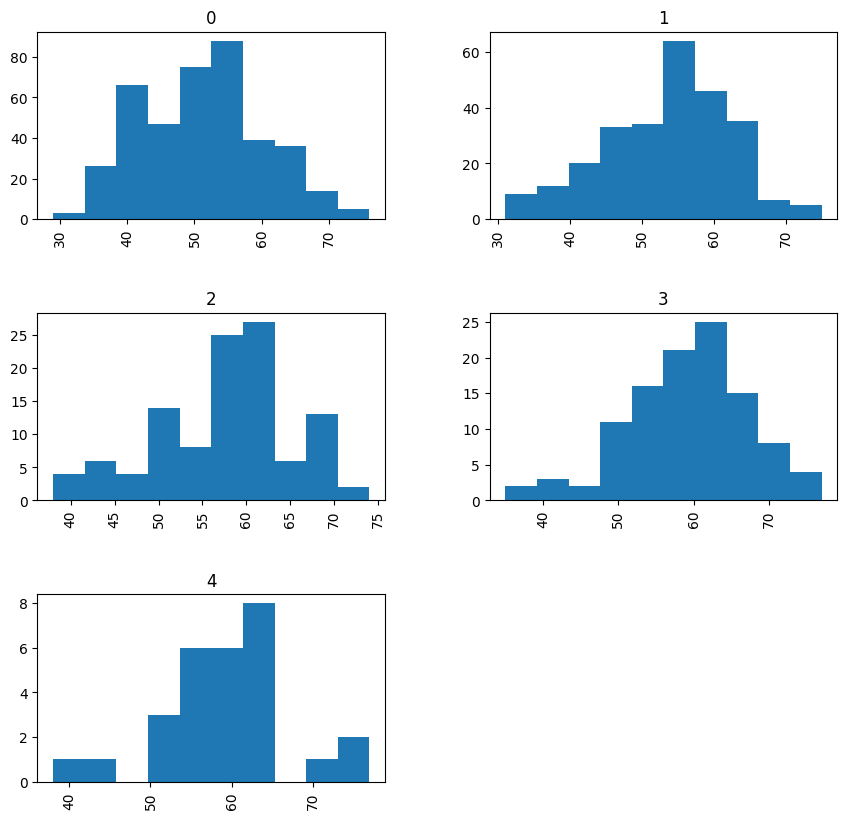

In [34]:
df.hist(column='age',by='num',figsize=(10,10))
plt.show()

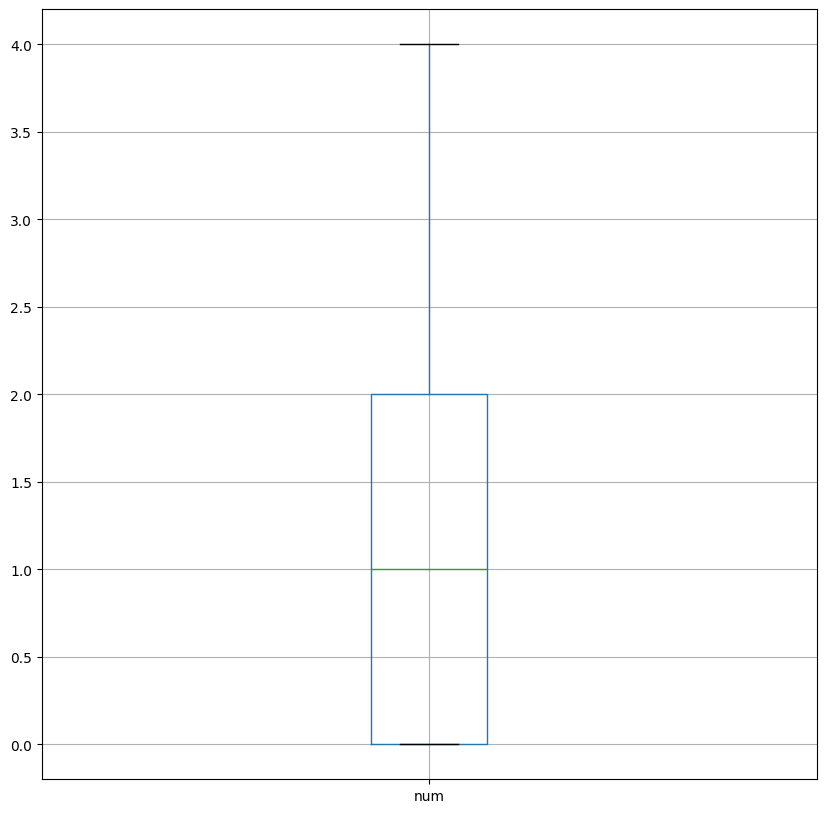

In [35]:
df.boxplot(column='num' ,figsize=(10,10))
plt.show()

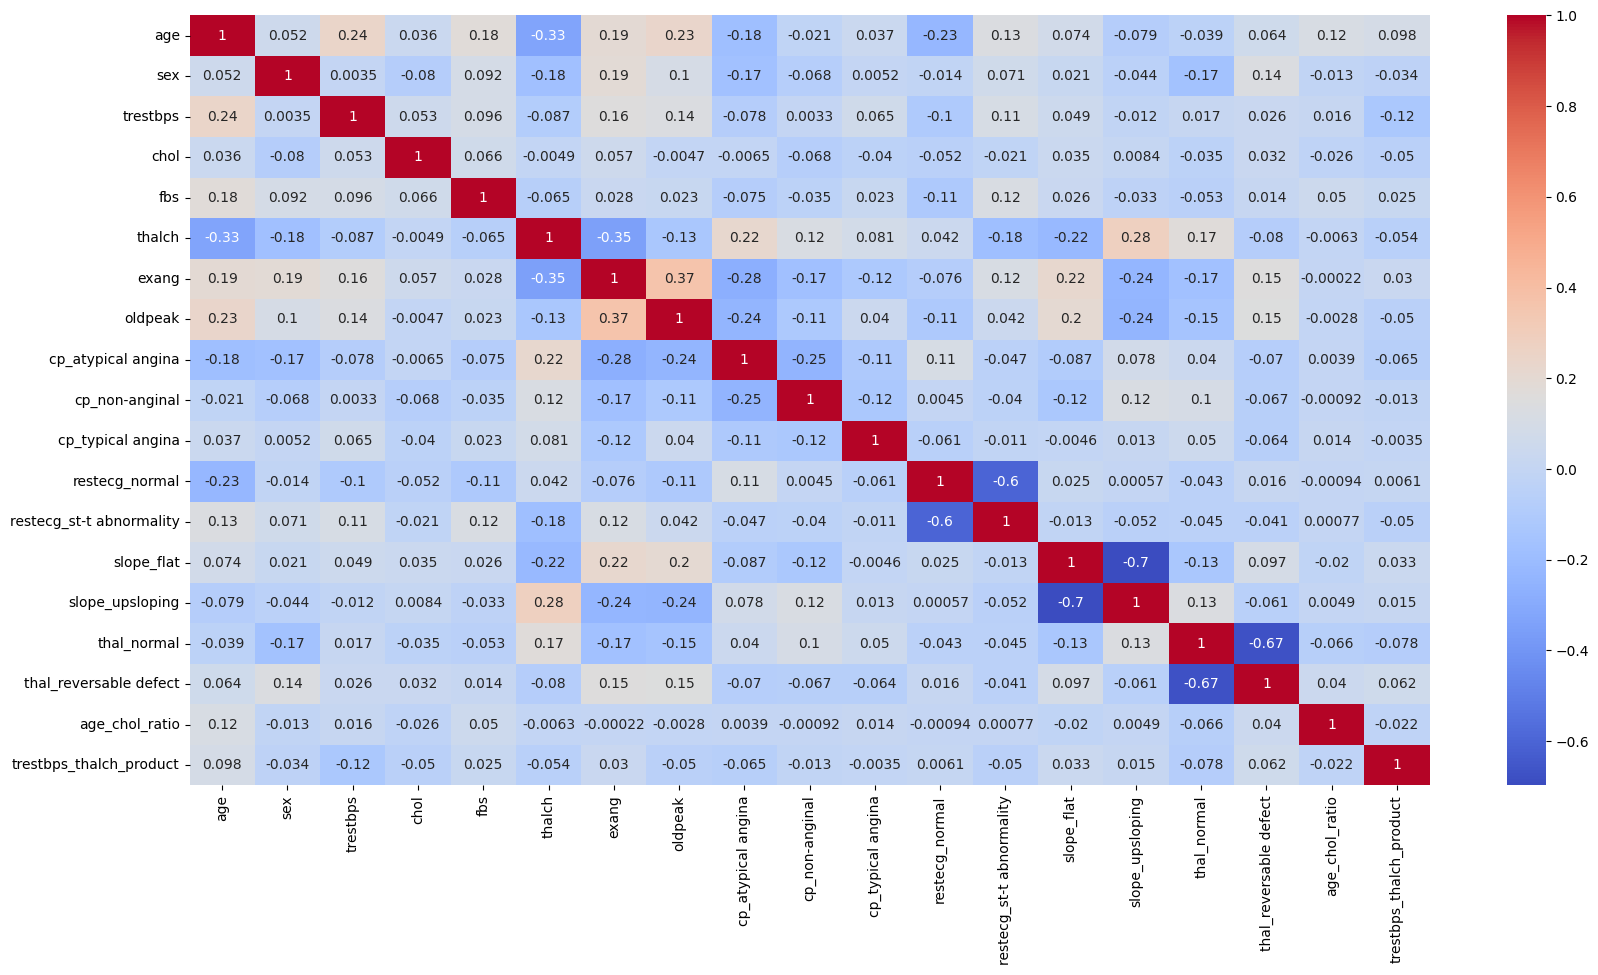

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(features.corr(),annot=True,cmap='coolwarm')
plt.show()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 19)
(182, 19)
(726,)
(182,)


In [39]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=60)

In [40]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=60)

In [41]:
y_pred=dec_tree.predict(x_test)

In [42]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.521978021978022


In [43]:
y_pred_proba = dec_tree.predict_proba(x_test)

In [44]:
precision=precision_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
roc_auc=roc_auc_score(y_test,y_pred_proba,multi_class='ovr',average='weighted')
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.4819503625626075
F1 Score: 0.49627656382011165
Recall: 0.521978021978022
ROC AUC: 0.7380239932892498


In [45]:
param_grid={'criterion':['gini','entropy'],
            'max_depth':[2,3,4,5,6],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'splitter':['best','random']}

In [46]:
grid_search=GridSearchCV(estimator=dec_tree,param_grid=param_grid,cv=10)

In [47]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1009, in fit
    super()._fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_c

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=60),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [48]:
best_params=grid_search.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [49]:
best_model=grid_search.best_estimator_

In [50]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=60)

In [51]:
best_y_pred=best_model.predict(x_test)

In [52]:
best_accuracy=accuracy_score(y_test,best_y_pred)
print(f"Accuracy: {best_accuracy}")


Accuracy: 0.5494505494505495


In [53]:
best_y_pred_proba=best_model.predict_proba(x_test)

In [54]:
best_precision=precision_score(y_test,best_y_pred,average='weighted')
best_f1=f1_score(y_test,best_y_pred,average='weighted')
best_recall=recall_score(y_test,best_y_pred,average='weighted')
best_roc_auc=roc_auc_score(y_test,best_y_pred_proba,multi_class='ovr',average='weighted')
print(f"Precision: {best_precision}")
print(f"F1 Score: {best_f1}")
print(f"Recall: {best_recall}")
print(f"ROC AUC: {best_roc_auc}")

Precision: 0.4696211267426114
F1 Score: 0.5060249691828638
Recall: 0.5494505494505495
ROC AUC: 0.714717650248163


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


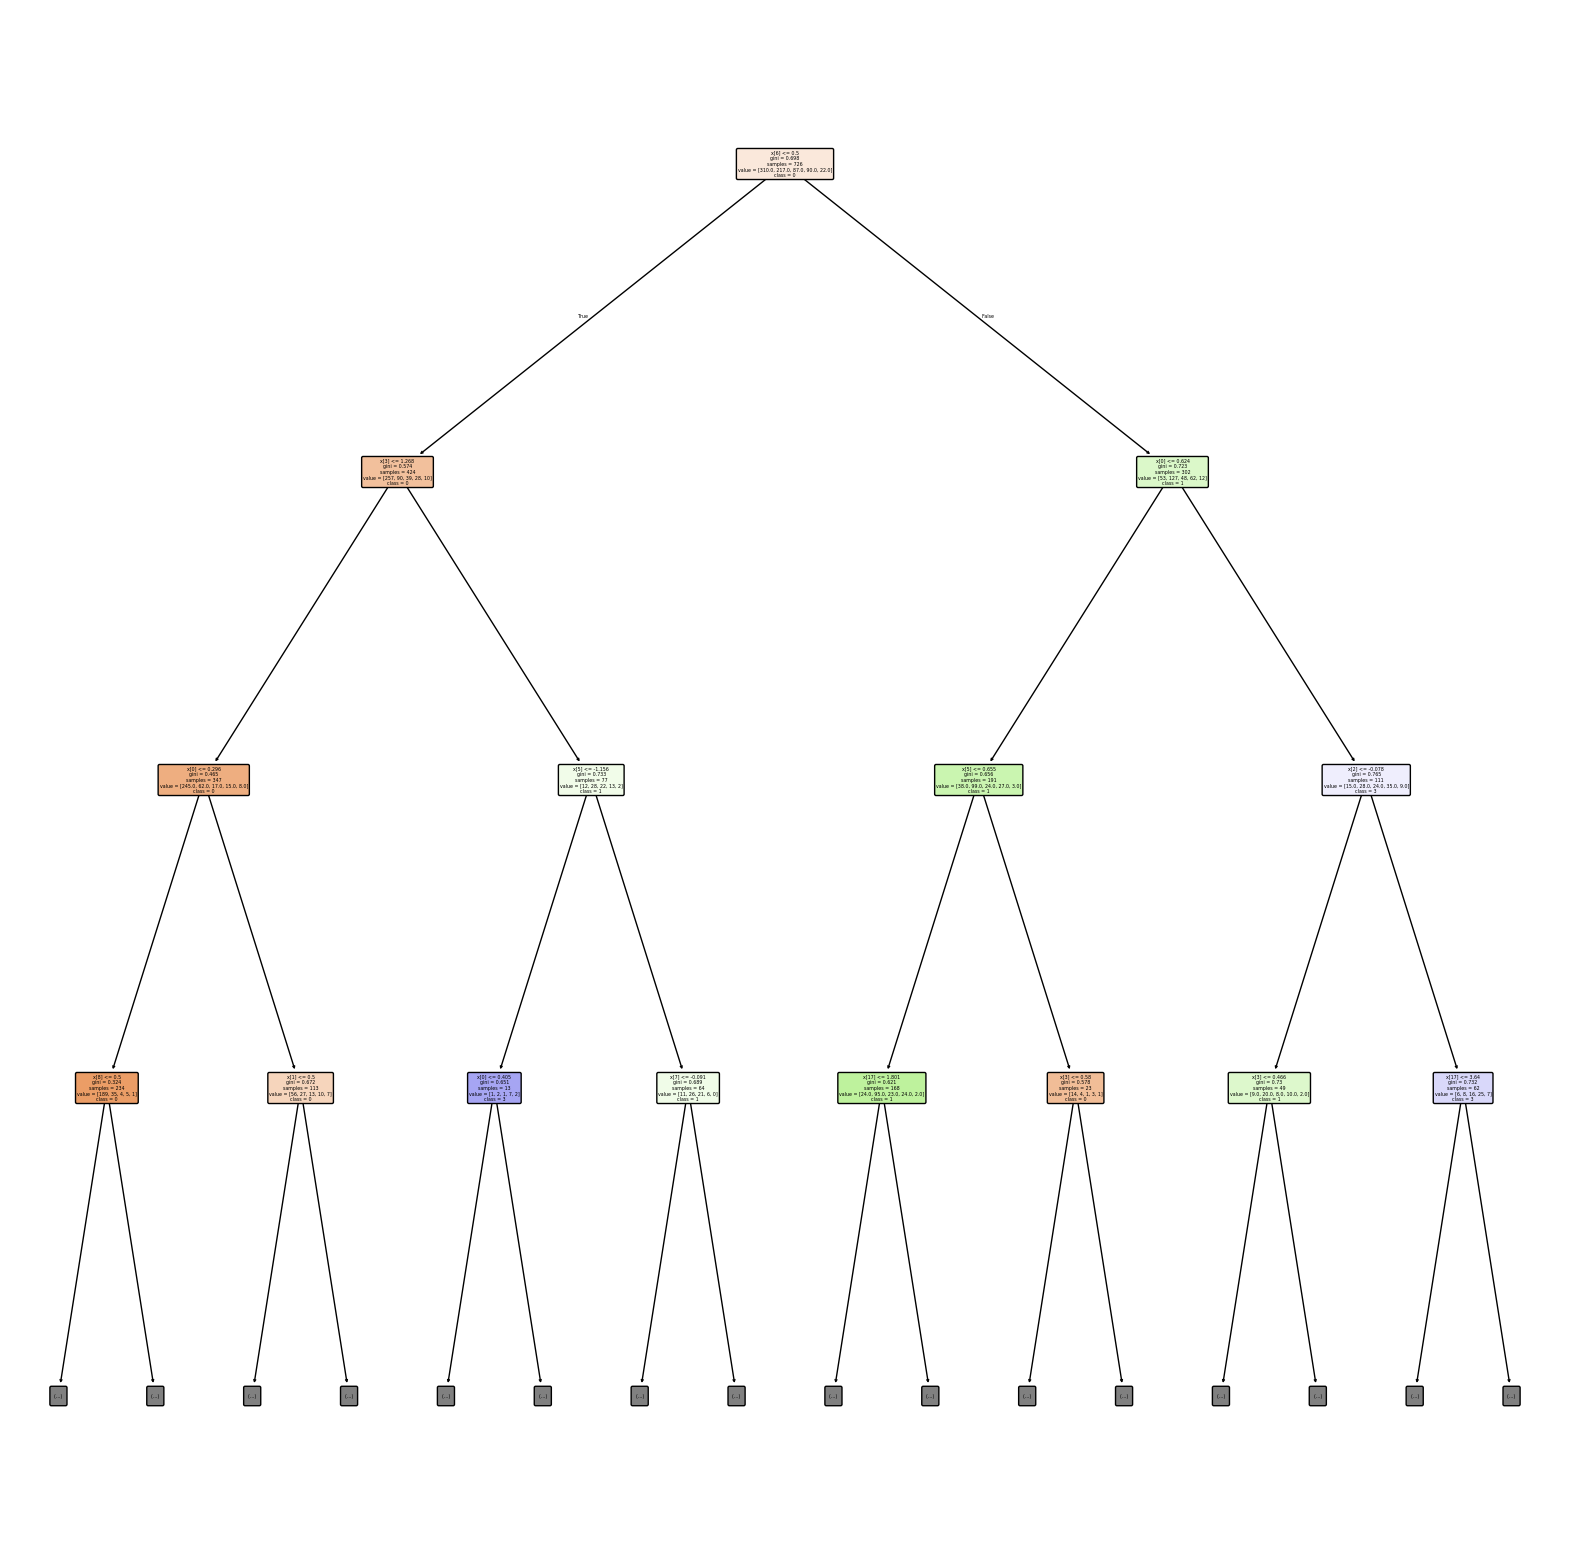

In [55]:
# Visualize decision tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dec_tree,rounded=True,max_depth=3, class_names=['0', '1', '2', '3', '4'], filled=True);

# **INTERVIEW QUESTIONS:**
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?



*   **criterion:**
The function used to measure the quality of a split. Supported criteria are 'gini' for the Gini impurity and 'entropy' for the information gain.
Influences how the decision tree chooses the best split points. 'gini' is usually faster but 'entropy' can be more accurate in some cases.

*  **max_depth:**
The maximum depth of the tree.
	Limits the tree's complexity. Deeper trees can capture more complex relationships but are prone to overfitting. Shallower trees are simpler and may underfit

*   **min_samples_split:**
	The minimum number of samples required to split an internal node.	Controls the size of the tree. Larger values prevent splits on small subsets of data, reducing overfitting. Smaller values can lead to more complex trees.
* **min_samples_leaf:**
	The minimum number of samples required to be at a leaf node.
	Similar to min_samples_split, it controls tree size and complexity. Larger values lead to smaller trees and can help with overfitting. Smaller values allow for finer-grained predictions.
* **max_features:**
	The number of features to consider when looking for the best split.
  Reduces the number of features considered at each split, potentially speeding up training and reducing overfitting.
* **splitter:**
	The strategy used to choose the split at each node. Supported strategies are 'best' to choose the best split and 'random' to choose a random split.
	'best' often leads to better accuracy but 'random' can be faster and less prone to overfitting in some cases.


2. What is the difference between the Label encoding and One-hot encoding?

**Label Encoding:** Converts categories to integers, introducing potential ordinal relationships.

**One-Hot Encoding:** Converts categories to binary vectors, avoiding ordinal relationships but increasing the feature space.